# 🚀 Advanced Exploratory Data Analysis EDA — High-Integrity Systems

This notebook focuses on developing deeper insights into high-integrity system data through EDA tasks. You’ll investigate patterns, anomalies, and correlations across system metrics using Python.

This version includes:
- Conceptual understanding
- Thought-provoking analysis
- Hands-on statistical interpretation


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

import seaborn as sns
sns.set(style='whitegrid')

#### Load the data

In [5]:
df = pd.read_csv("generated_his_system_metrics.csv", index_col=0)
df.head()

,sensor_latency_ms,cpu_usage_percent,memory_usage_mb,error_count,uptime_hours,mode,temperature_sensor,CPU_temperature,CPU_thermostat_stability,sensor_thermostat_stability
system_id,,,,,,,,,,
1,22.483571,58.892663,420.457194,0,130.837373,normal,26.146247,50.9,956.574776,111.788151
2,19.308678,73.641250,316.802495,0,48.285983,normal,56.447908,59.1,1039.893818,87.168360
3,23.238443,24.021486,174.484049,1,92.523906,normal,57.172326,48.8,1011.319140,83.611087
4,27.615149,53.444539,96.321615,0,63.130883,emergency,28.567063,42.7,939.748211,103.078886
5,18.829233,35.240361,311.006058,2,47.978239,normal,31.508234,46.8,976.855990,113.168138


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sensor_latency_ms            500 non-null    float64
 1   cpu_usage_percent            500 non-null    float64
 2   memory_usage_mb              500 non-null    float64
 3   error_count                  500 non-null    int64  
 4   uptime_hours                 500 non-null    float64
 5   mode                         500 non-null    object 
 6   temperature_sensor           500 non-null    float64
 7   CPU_temperature              500 non-null    float64
 8   CPU_thermostat_stability     500 non-null    float64
 9   sensor_thermostat_stability  500 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 43.0+ KB


### Section 1, exploring distributions with histograms

✅ Task for students: Classify each variable as:
- Categorical (Nominal/Ordinal)
- Numerical (Discrete/Continuous)

By completing and running this cell, the categorical columns names will be saved as a list of strings in "categorical_cols". Likewise, the numerical_cols should be saved in "numerical_cols".

In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

✅ Task for students:
You want now to check the distribution of the variables:
- When is a histogram preferable to a bar plot?
- Plot the histogram for the different variables

In [8]:
Answer_Q11 = "when the variables are numerical"

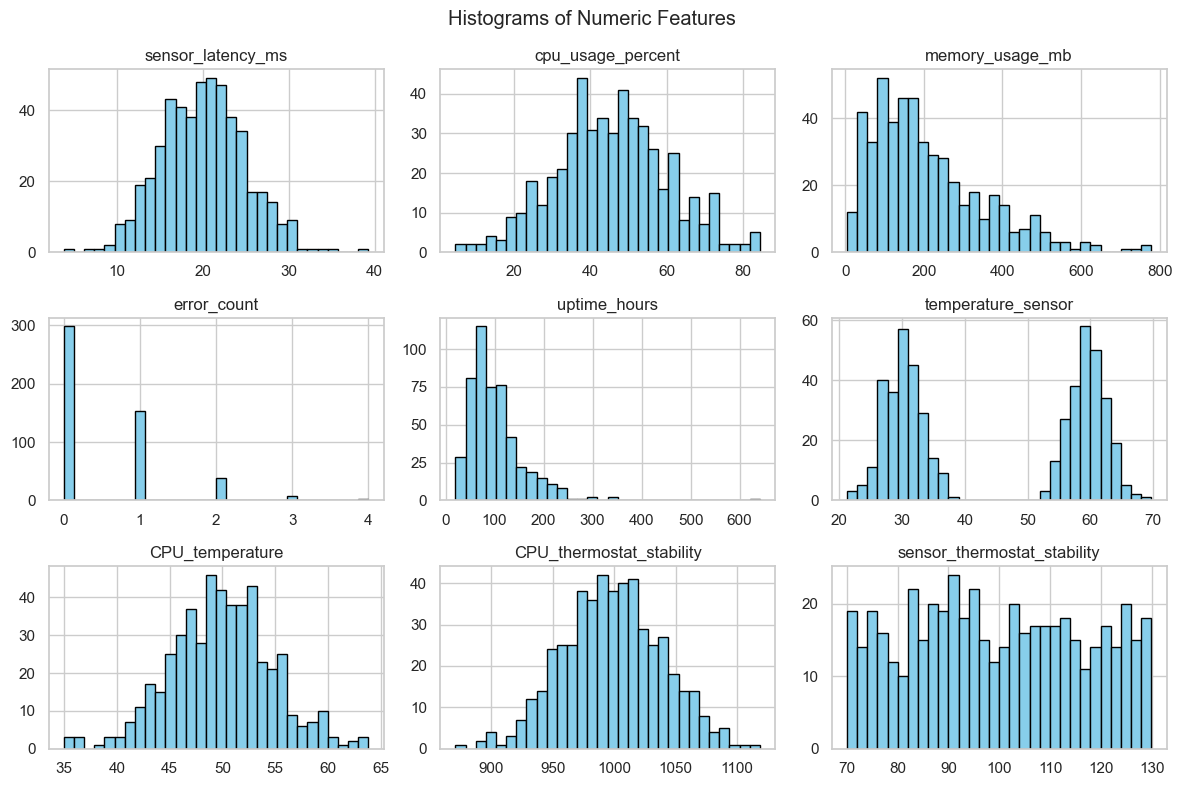

In [9]:
# Your code here: use matplotlib or pandas plotting to plot histograms
df[numerical_cols].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

✅ Task for students: 
- Describe the shape of the distribution of uptime.
- What maintenance strategies might be influenced by this shape?

In [10]:
Answer_Q12 = "negatively skewed (right skewed)"

Answer_Q13 = "Preventive Maintenance Focused on Long-Uptime Systems ensuring they dont run for long periods without maintenance"

✅ Task for students:

- maintenance engineer presented the following plot for System Modes. Could this bar chart leing or hidding something? what should we change to fix it?
  
- do you think the maintenance engineer are responding well to the emergency?

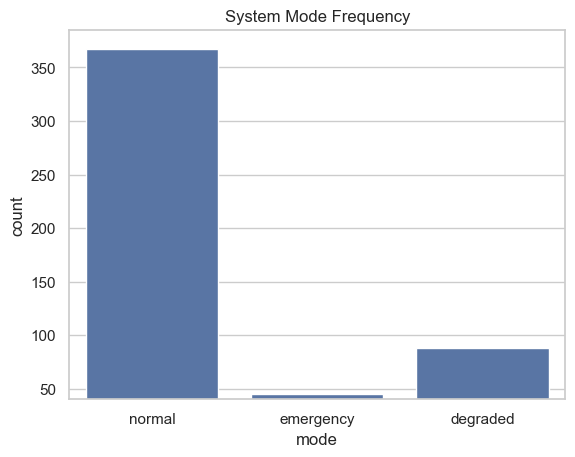

In [11]:
sns.countplot(x='mode', data=df)
plt.ylim(40, None)  # Start y-axis at 50
plt.title("System Mode Frequency")
plt.show()

In [12]:
Answer_Q14 = "this bar is giving an impression that emergency is quite rare event. \
              Starting the bar plot at a nonzero value is reponsbile for this impression"

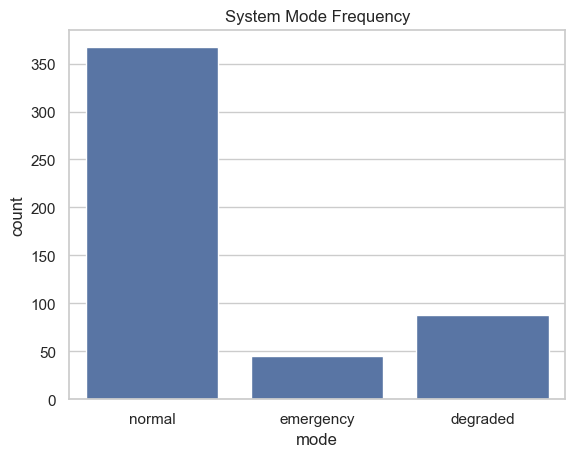

In [13]:
# to fix the barplot we need to ensure the y axis starts at 0
sns.countplot(x='mode', data=df)
plt.title("System Mode Frequency")
plt.show()

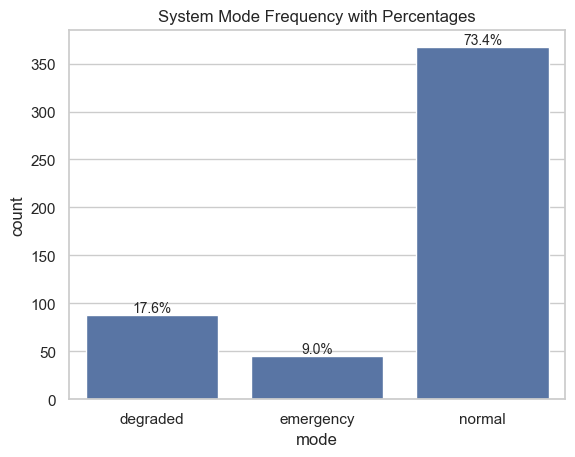

In [14]:
# a better way to present the mode frequency is to add counts as well as percentages  

# Count occurrences and percentages
counts = df['mode'].value_counts().sort_index()
total = len(df)
percentages = 100 * counts / total

# Create the count plot
ax = sns.countplot(x='mode', data=df, order=counts.index)


for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)


plt.title("System Mode Frequency with Percentages")

plt.show()

In [15]:
Answer_Q15 = "the system is operating 9% of times in emergency mode which is relatively high"

### Section 2: exploring with box plots

✅ Task for students:
Look at the following box plot and answer:
- what  variables can a box plot be misleading? explain why?

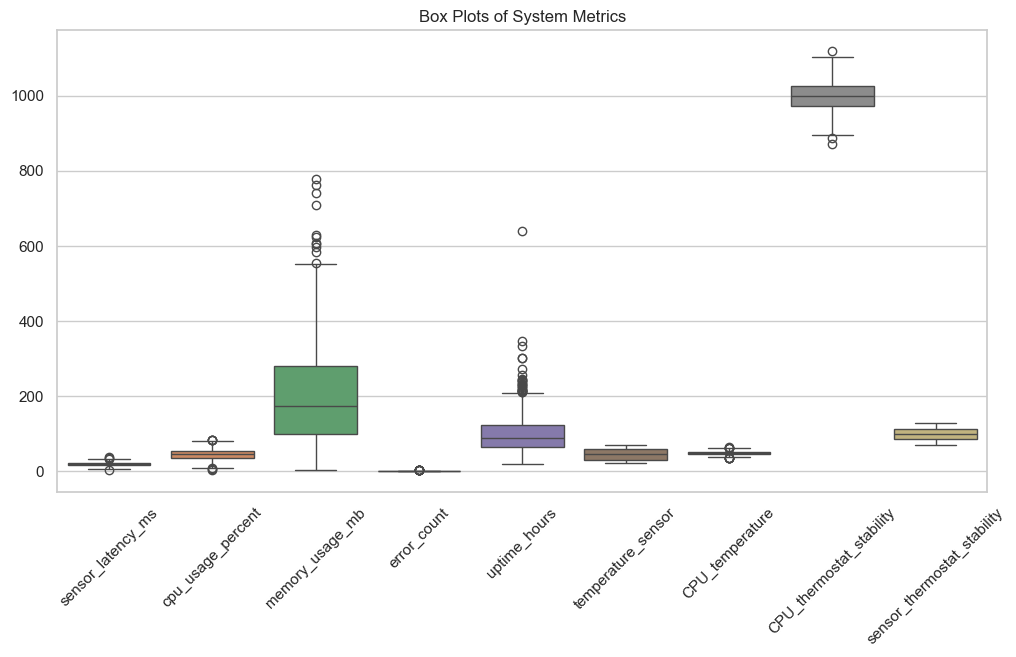

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots of System Metrics')
plt.xticks(rotation=45)
plt.show()

In [17]:
# your answer here
Answer_Q21 = "A boxplot can be misleading if the data distribution is Multimodal (Multiple Peaks),\
              A variable with values concentrated in two distinct groups will look normal in a box plot."

✅ Task for students:
Look at the box plot above and answer:
- Is there anything else wrong with the plot and what can you do to improve it?

In [18]:
Answer_Q22 = "The variables have significantly different value ranges, but they are plotted on the same y-axis. \
              Using unnormalized boxplots causes variables with smaller ranges to appear compressed, potentially leading to misleading interpretations.\
              It is better to split the plot into different subplots each having its owns y-axis"

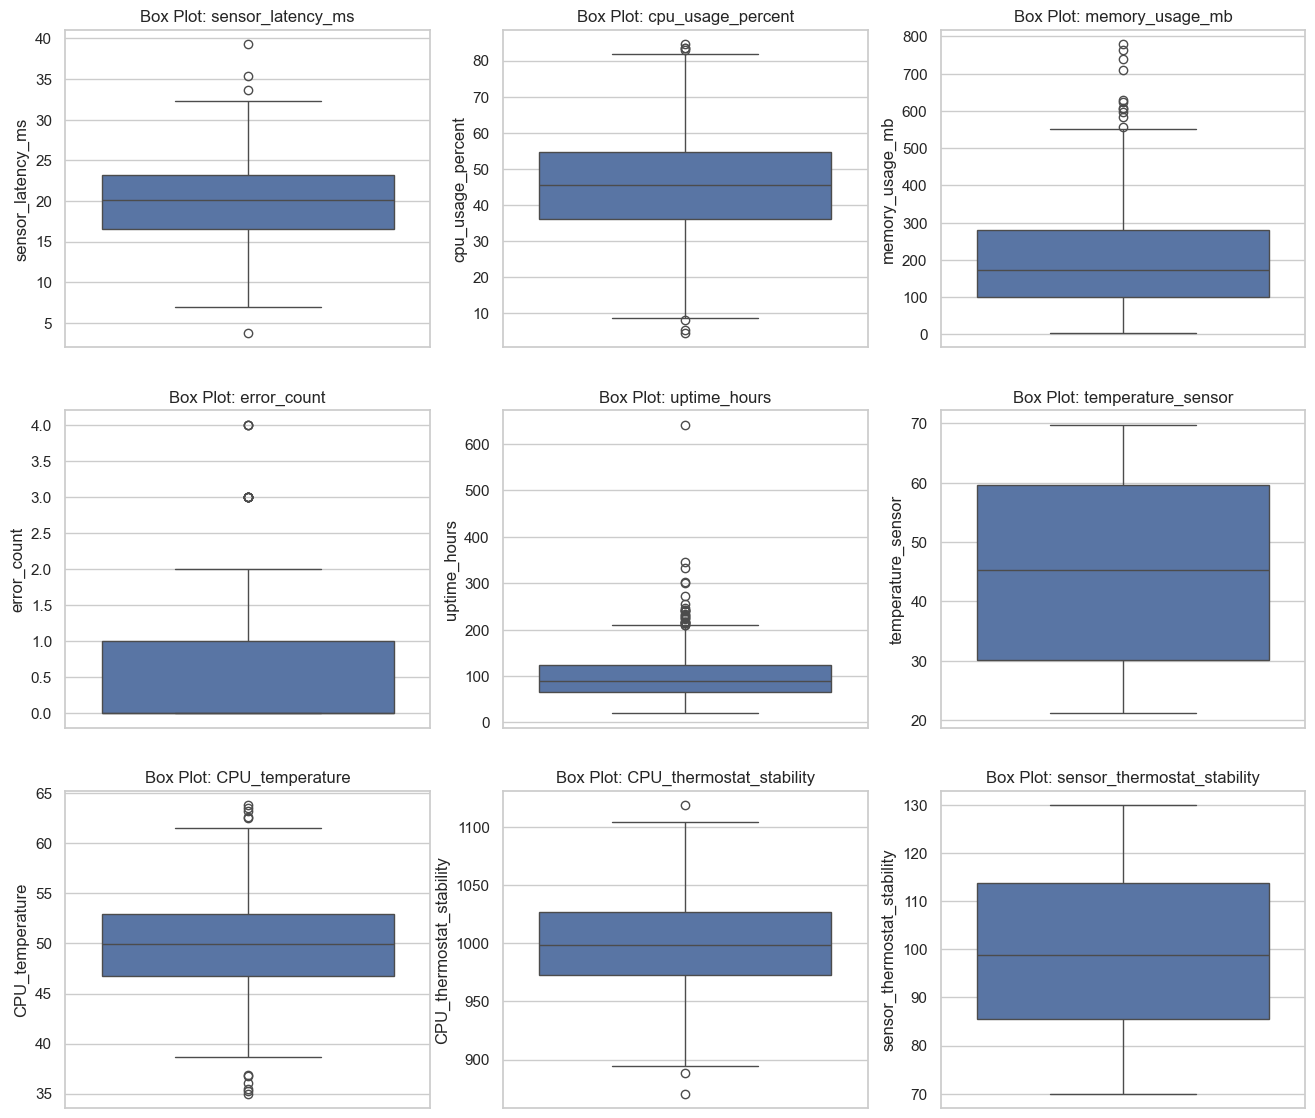

In [19]:
# Your code to improve the plot here

# Create 4 rows × 2 columns of subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 14))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each variable in its subplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

### Section 3: Measures of Center and Variability


✅ Task for students: print the descriptive statistics to summarize the central tendency, dispersion and shape of all columns in the data

In [20]:
# your code here
df.describe()

,sensor_latency_ms,cpu_usage_percent,memory_usage_mb,error_count,uptime_hours,temperature_sensor,CPU_temperature,CPU_thermostat_stability,sensor_thermostat_stability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,20.034190,45.477392,207.990699,0.530000,101.862871,44.883734,49.862200,998.454241,99.666243
std,4.906266,14.669958,141.869183,0.755143,57.087795,15.111446,4.793356,40.168303,17.177764
min,3.793663,4.546700,4.591898,0.000000,20.174754,21.211654,35.000000,870.757800,70.004913
25%,16.498463,36.070624,99.706662,0.000000,65.496874,30.127272,46.775000,972.385948,85.449614
50%,20.063986,45.427974,173.237281,0.000000,88.391079,45.293119,49.900000,998.539629,98.854628
75%,23.183916,54.768634,280.858874,1.000000,123.137689,59.614568,52.900000,1026.784419,113.773332
max,39.263657,84.485731,778.689043,4.000000,641.057306,69.729279,63.800000,1118.345018,129.935104


✅ Task for students: 
Using the plots and the descriptive statistics above try to solve the following questions. Please complement with further measures if needed.

1. Which metric shows the most variability? Justify using both range and standard deviation.
   
2. Compare sensor latency and uptime. Which one is more consistent across systems

   
3. Can we compare variability across metrics with different units (e.g., ms vs MB)?

   
4. For which variable would the median be a better measure of "typical" than the mean?

In [21]:
Answer_Q31 = "memory_usage_mb shows the highest variability with a std of 141.87 and a range of 774.10. \
              uptime_hours also has high spread, but lower std (57.09). Variability should be compared using normalized measures like std/mean, not std alone."

Answer_Q32 = "sensor_latency_ms is far more consistent — its standard deviation is only ~25% of its mean, while uptime_hours shows much greater relative spread. \
              In other words the Coefficient of Variation is smaller for sensor_latency_ms "

Answer_Q33 = "Not directly — because units and scales differ, absolute std values are not meaningful across metrics.\
              Use normalized metrics such as: Coefficient of Variation (CV) = std / mean"

Answer_Q34 = "uptime_hours, error_count both are highly skewed "

✅ Task for students:
1. Identify one metric where mean > median > mode. What does this indicate about skewness?
2. Can you find a metric there is not big differences between mean ≈ median ≈ mode? What does thus tell us about the distribution shape?

In [22]:
# Your code here
for col in numerical_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    print(f"{col}: Mean={mean:.2f}, Median={median:.2f}, Mode={mode:.2f}")

sensor_latency_ms: Mean=20.03, Median=20.06, Mode=3.79
cpu_usage_percent: Mean=45.48, Median=45.43, Mode=4.55
memory_usage_mb: Mean=207.99, Median=173.24, Mode=4.59
error_count: Mean=0.53, Median=0.00, Mode=0.00
uptime_hours: Mean=101.86, Median=88.39, Mode=20.17
temperature_sensor: Mean=44.88, Median=45.29, Mode=21.21
CPU_temperature: Mean=49.86, Median=49.90, Mode=52.70
CPU_thermostat_stability: Mean=998.45, Median=998.54, Mode=870.76
sensor_thermostat_stability: Mean=99.67, Median=98.85, Mode=70.00


In [23]:
# mean > median > mode
# memory_usage_mb → 207.99 > 173.24 > 4.59
# uptime_hours → 101.86 > 88.39 > 20.17

Answer_Q35 = " This pattern indicates a positively (right) skewed distribution.\
               A long right tail pulls the mean upward, the median sits in the middle, and the mode is at the lower, most frequent values."

In [24]:
# mean ≈ median ≈ mode
# cpu_usage_percent → 45.48 ≈ 45.43 (but mode = 4.55, so not quite)
# sensor_latency_ms → 20.03 ≈ 20.06 (but mode still low at 3.79)

Answer_Q36 = " If a metric truly had mean ≈ median ≈ mode, it would indicate a roughly symmetric, unimodal distribution — similar to a normal distribution. "

### Section 4: Quantiles, percentiles, and Outliers

✅ Task for students:

- calculate quantiles [0.01, 0.25, 0.5, 0.75, 0.99] for uptime_hours and sensor_latency_ms

In [25]:
# Your code here
df[['sensor_latency_ms', 'uptime_hours']].quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,sensor_latency_ms,uptime_hours
0.01,9.802429,25.936007
0.25,16.498463,65.496874
0.50,20.063986,88.391079
0.75,23.183916,123.137689
0.99,30.958488,273.254100


✅ Task for students:
- calculate IQR for sensor_latency_ms

In [26]:
# Your code here
# For sensor_latency_ms
q1 = df['sensor_latency_ms'].quantile(0.25)
q3 = df['sensor_latency_ms'].quantile(0.75)
iqr = q3 - q1
print(f"IQR of sensor_latency_ms: {iqr}")

IQR of sensor_latency_ms: 6.685453292992861


✅ Task for students:
- calculate IQR for uptime_hours

In [27]:
# Your code here
# For uptime_hours
q1 = df['uptime_hours'].quantile(0.25)
q3 = df['uptime_hours'].quantile(0.75)
iqr = q3 - q1

print(f"IQR of uptime_hours: {iqr}")

IQR of uptime_hours: 57.64081552793367


✅ Task for students: Can we use the IQR to flag extreme values (outliers) using percentiles, check how and apply this to detect and count the outliers in .

The IQR outlier rule:

    - Lower bound = Q1 − 1.5 × IQR
    
    - Upper bound = Q3 + 1.5 × IQR

In [28]:
# Your code here
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['sensor_latency_ms'] < lower_bound) | (df['sensor_latency_ms'] > upper_bound)]
print(f"sensor_latency_ms Outliers detected: {len(outliers)}")

sensor_latency_ms Outliers detected: 0


In [29]:
# Your code here
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['uptime_hours'] < lower_bound) | (df['uptime_hours'] > upper_bound)]
print(f"uptime_hours outliers detected: {len(outliers)}")

uptime_hours outliers detected: 25


✅ Task for students: Why might some outliers be legitimate and not errors?


Values outside this range can be flagged as potential outliers, under some assumptions — such as the data being approximately symmetric and without heavy tails. In highly skewed or long-tailed distributions, this rule may flag many legitimate values as "outliers.

In [27]:
Answer_Q41 = "In this dataset, uptime_hours likely yields many outliers due to long tails and skew. Some of these outliers can actually extreme but quite expected values"

### Section 5: compare variables

✅ Task for students:
Which thermostat is more stable and consistent, print the mean values and standard deviations and explain why it can be misleading to use only these measures to compare

CPU_thermostat_stability: Mean = 998.45, Std = 40.17, CV = 0.040
sensor_thermostat_stability: Mean = 99.67, Std = 17.18, CV = 0.172


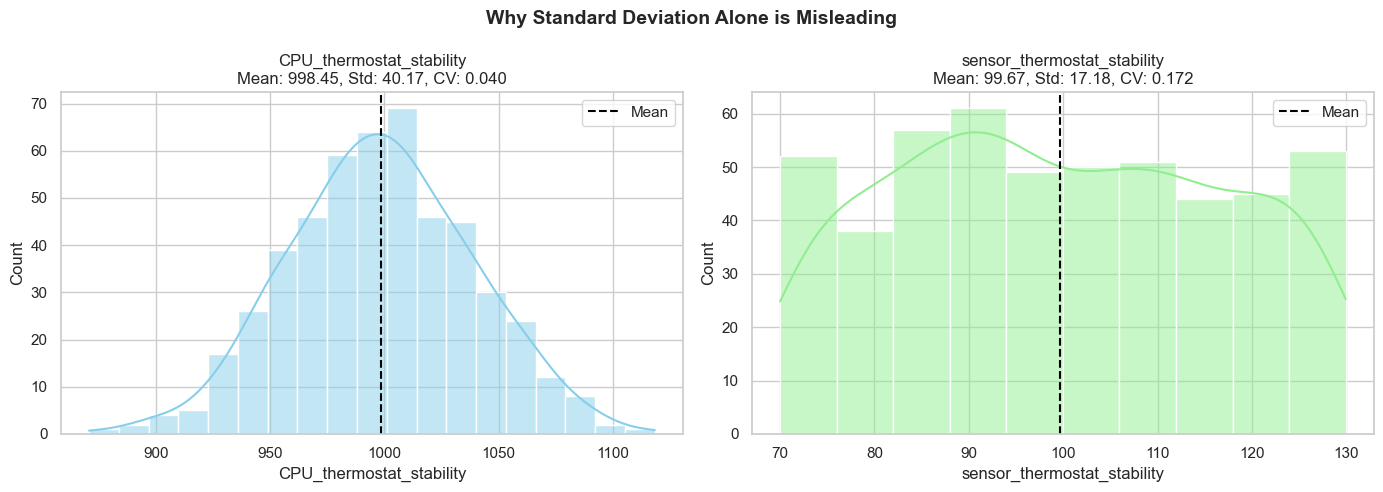

In [28]:
# Your code here

# Variables to compare
var1 = "CPU_thermostat_stability"
var2 = "sensor_thermostat_stability"

# Your code here

# Compute statistics
mean_1 = df[var1].mean()
std_1 = df[var1].std()
cv_1 = std_1 / mean_1

mean_2 = df[var2].mean()
std_2 = df[var2].std()
cv_2 = std_2 / mean_2

# Print stats
print(f"{var1}: Mean = {mean_1:.2f}, Std = {std_1:.2f}, CV = {cv_1:.3f}")
print(f"{var2}: Mean = {mean_2:.2f}, Std = {std_2:.2f}, CV = {cv_2:.3f}")

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[var1], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'{var1}\nMean: {mean_1:.2f}, Std: {std_1:.2f}, CV: {cv_1:.3f}')
axes[0].axvline(mean_1, color='black', linestyle='--', label='Mean')
axes[0].legend()

sns.histplot(df[var2], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title(f'{var2}\nMean: {mean_2:.2f}, Std: {std_2:.2f}, CV: {cv_2:.3f}')
axes[1].axvline(mean_2, color='black', linestyle='--', label='Mean')
axes[1].legend()

plt.suptitle("Why Standard Deviation Alone is Misleading", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [29]:
# Your code here
Answer_Q51 = "Although the CPU thermostat has a higher standard deviation, its relative variability (CV) is much lower.\
              This means the CPU thermostat is actually more consistent. Comparing raw standard deviations alone can be misleading when the means differ significantly."

### Section6: Scatter Plot Analysis

✅ Task for students:
1. can you identify any clusters or linear relationships between the variables: sensor_latency_ms and cpu_usage_percent. Which plot can we use to plot this?
2. Which mode is associated with higher CPU load?

In [30]:
Answer_Q61 = "to answer this question we can take a look at scatter plot of the variables or computer the correltion between the variables"

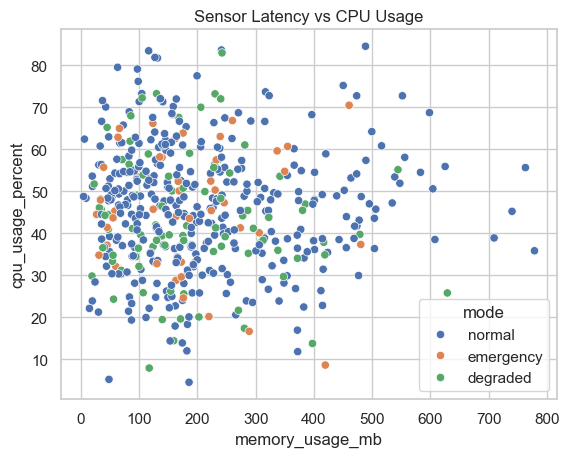

In [31]:
# Your code here
sns.scatterplot(x='memory_usage_mb', y='cpu_usage_percent', hue='mode', data=df)
plt.title("Sensor Latency vs CPU Usage")
plt.show()

In [32]:
Answer_Q62 = "there are no clear clusters in the data and all modes can be associated with higher CPU load"

### Section7: Correlation Matrix

✅ Task for students:
-  Code to identify the strongest positive and negative relationships between the variables

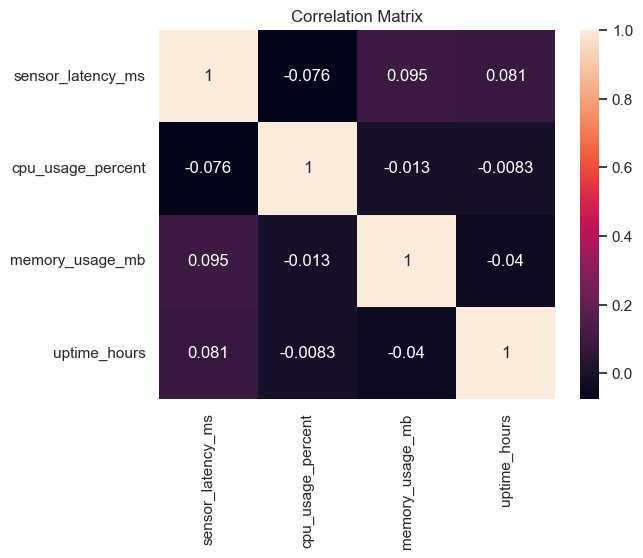

In [33]:
# Your code here
sns.heatmap(df[['sensor_latency_ms', 'cpu_usage_percent', 'memory_usage_mb', 'uptime_hours']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()